In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [2]:
df=pd.read_csv("doge.csv",parse_dates=True,index_col=0)

In [3]:
df

,Close
Date,
2021-05-01,0.392987
2021-05-02,0.376046
2021-05-03,0.441707
2021-05-04,0.541334
2021-05-05,0.657633
...,...
2022-04-26,0.137767
2022-04-27,0.139700
2022-04-28,0.137363


In [6]:
adresult=adfuller(df['Close'])
adresult[1]

0.005190033494217154

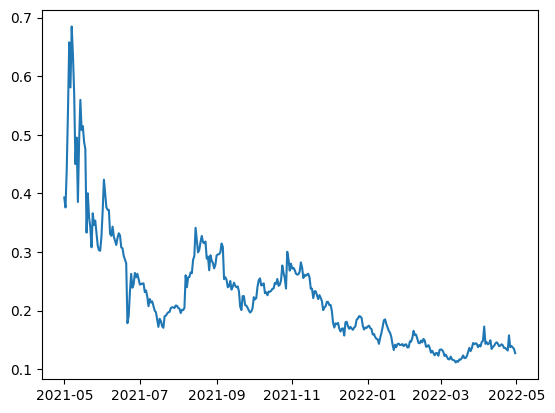

In [7]:
plt.plot(df['Close'])

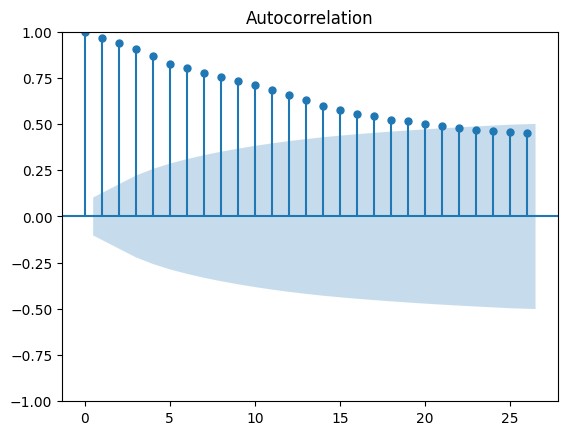

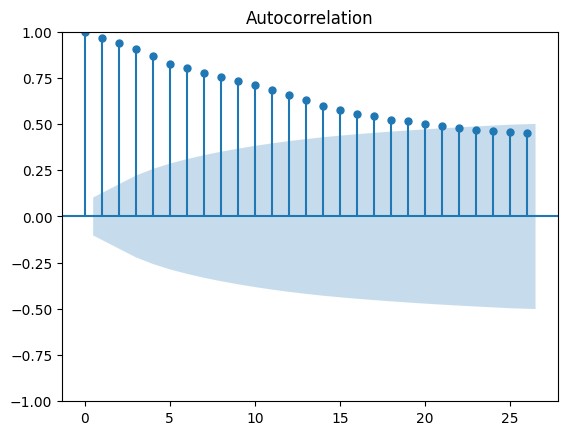

In [8]:
#plot using stationary data.if differencing required plot the differenced data
plot_acf(df['Close'])

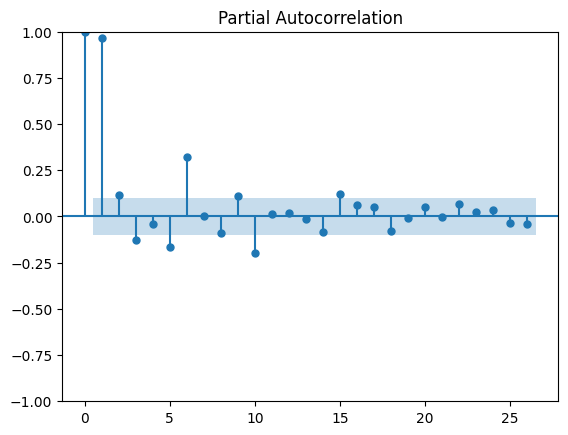

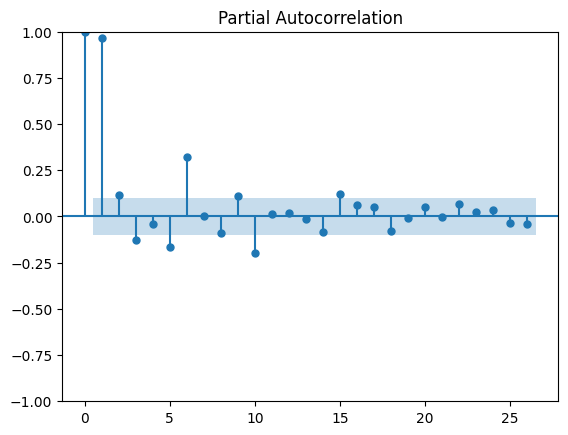

In [9]:
plot_pacf(df['Close'])

In [10]:
train=df[:-12]
test=df[-12:]

In [13]:
import pmdarima as pm
auto_arima = pm.auto_arima(train, stepwise=False, seasonal=False)
auto_arima

ARIMA(order=(0, 1, 5), scoring_args={}, suppress_warnings=True)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 28.1 MB/s eta 0:00:00


In [16]:
#fit using original data
model=ARIMA(train,order=(2,0,0))
fitted_model=model.fit()
fitted_model.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  353
Model:                 ARIMA(2, 0, 0)   Log Likelihood                 829.569
Date:                Wed, 06 Dec 2023   AIC                          -1651.137
Time:                        11:28:57   BIC                          -1635.671
Sample:                    05-01-2021   HQIC                         -1644.983
                         - 04-18-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2351      0.049      4.828      0.000       0.140       0.331
ar.L1          0.8496      0.021     40.531      0.000       0.809       0.891
ar.L2          0.1214      0.020      5.971      0.000       0.082       0.161
sigma2         0.0005   1.47e-05     35.861      0.000       0.000       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              2961.30
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.04   Skew:                             0.48
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
model1=ARIMA(train,order=(0,1,5))
fitted_model=model1.fit()
fitted_model.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  353
Model:                 ARIMA(0, 1, 5)   Log Likelihood                 858.827
Date:                Wed, 06 Dec 2023   AIC                          -1705.655
Time:                        11:34:15   BIC                          -1682.473
Sample:                    05-01-2021   HQIC                         -1696.430
                         - 04-18-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0834      0.031     -2.725      0.006      -0.143      -0.023
ma.L2          0.0527      0.025      2.120      0.034       0.004       0.101
ma.L3         -0.0722      0.036     -2.030      0.042      -0.142      -0.002
ma.L4          0.1398      0.034      4.146      0.000       0.074       0.206
ma.L5         -0.4275      0.031    -13.640      0.000      -0.489      -0.366
sigma2         0.0004   1.54e-05     28.790      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              1378.45
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               0.04   Skew:                             0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

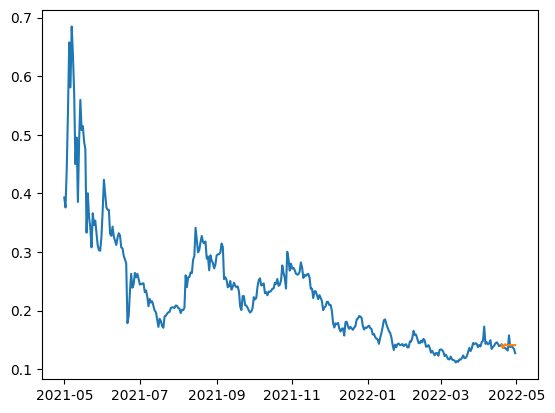

In [27]:
predictions=fitted_model.forecast(len(test))
df['forecast_manual'] = [None]*len(train) + list(predictions)
plt.plot(df)